In [1]:
import pandas as pd 
import datetime as dt
import numpy as np
import matplotlib.pyplot as  plt
import seaborn as sn

In [2]:
data=pd.read_csv("Predictive_Analyst.csv")

In [3]:
data.head()

,date,device,landing_page,landing_pageviews,checkout_pageviews,thankyou_pageviews,revenue,Revenue,Land_to_checkout,checkout_to_TY,Land _to_TY,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,1/1/2017,Desktop,Home,1106,147,33,"$1,110",1110,0.13,0.22,0.029837,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1/2/2017,Desktop,Home,1214,181,37,"$1,110",1110,0.15,0.20,0.030478,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1/3/2017,Desktop,Home,1265,189,39,"$1,131",1131,0.15,0.21,0.030830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1/4/2017,Desktop,Home,1232,185,38,"$1,064",1064,0.15,0.21,0.030844,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1/5/2017,Desktop,Home,1254,188,37,"$1,170",1170,0.15,0.20,0.029506,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data=data.iloc[:,:11]

In [5]:
data.head()

,date,device,landing_page,landing_pageviews,checkout_pageviews,thankyou_pageviews,revenue,Revenue,Land_to_checkout,checkout_to_TY,Land _to_TY
0,1/1/2017,Desktop,Home,1106,147,33,"$1,110",1110,0.13,0.22,0.029837
1,1/2/2017,Desktop,Home,1214,181,37,"$1,110",1110,0.15,0.20,0.030478
2,1/3/2017,Desktop,Home,1265,189,39,"$1,131",1131,0.15,0.21,0.030830
3,1/4/2017,Desktop,Home,1232,185,38,"$1,064",1064,0.15,0.21,0.030844
4,1/5/2017,Desktop,Home,1254,188,37,"$1,170",1170,0.15,0.20,0.029506


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 11 columns):
date                   236 non-null object
device                 236 non-null object
landing_page           236 non-null object
landing_pageviews      236 non-null int64
checkout_pageviews     236 non-null int64
thankyou_pageviews     236 non-null int64
revenue                236 non-null object
Revenue                236 non-null int64
Land_to_checkout       236 non-null float64
checkout_to_TY         236 non-null float64
Land _to_TY            236 non-null float64
dtypes: float64(3), int64(4), object(4)
memory usage: 20.4+ KB


In [7]:
data['date']=pd.to_datetime(data['date'])

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 11 columns):
date                   236 non-null datetime64[ns]
device                 236 non-null object
landing_page           236 non-null object
landing_pageviews      236 non-null int64
checkout_pageviews     236 non-null int64
thankyou_pageviews     236 non-null int64
revenue                236 non-null object
Revenue                236 non-null int64
Land_to_checkout       236 non-null float64
checkout_to_TY         236 non-null float64
Land _to_TY            236 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(4), object(3)
memory usage: 20.4+ KB


In [9]:
data.columns

Index(['date', 'device ', 'landing_page', 'landing_pageviews',
       'checkout_pageviews', 'thankyou_pageviews ', 'revenue ', 'Revenue',
       'Land_to_checkout', 'checkout_to_TY', 'Land _to_TY'],
      dtype='object')

In [10]:
data=data.drop(columns=['revenue '])

In [11]:
data.columns=['Date', 'Device', 'Landing_page', 'Landing_pageviews',
       'Checkout_pageviews', 'Thankyou_pageviews', 'Revenue',
       'Land_to_checkout', 'Checkout_to_TY', 'Land_to_TY']

In [12]:
data.head()

,Date,Device,Landing_page,Landing_pageviews,Checkout_pageviews,Thankyou_pageviews,Revenue,Land_to_checkout,Checkout_to_TY,Land_to_TY
0,2017-01-01,Desktop,Home,1106,147,33,1110,0.13,0.22,0.029837
1,2017-01-02,Desktop,Home,1214,181,37,1110,0.15,0.20,0.030478
2,2017-01-03,Desktop,Home,1265,189,39,1131,0.15,0.21,0.030830
3,2017-01-04,Desktop,Home,1232,185,38,1064,0.15,0.21,0.030844
4,2017-01-05,Desktop,Home,1254,188,37,1170,0.15,0.20,0.029506


In [13]:
data['revenue_average']=data['Revenue']/data['Thankyou_pageviews']

In [14]:
DH=data[(data['Device']=='Desktop ')&(data['Landing_page']=='Home')]
MH=data[(data['Device']=='Mobile ')&(data['Landing_page']=='Home')]
DP=data[(data['Device']=='Desktop ')&(data['Landing_page']=='Product ')]
MP=data[(data['Device']=='Mobile ')&(data['Landing_page']=='Product ')]

In [15]:
MP

,Date,Device,Landing_page,Landing_pageviews,Checkout_pageviews,Thankyou_pageviews,Revenue,Land_to_checkout,Checkout_to_TY,Land_to_TY,revenue_average
177,2017-01-01,Mobile,Product,1283,137,35,312,0.11,0.26,0.027280,8.914286
178,2017-01-02,Mobile,Product,1425,171,39,312,0.12,0.23,0.027368,8.000000
179,2017-01-03,Mobile,Product,1293,155,36,216,0.12,0.23,0.027842,6.000000
180,2017-01-04,Mobile,Product,1321,159,37,222,0.12,0.23,0.028009,6.000000
181,2017-01-05,Mobile,Product,1297,156,36,216,0.12,0.23,0.027756,6.000000
182,2017-01-06,Mobile,Product,1220,146,34,238,0.12,0.23,0.027869,7.000000
183,2017-01-07,Mobile,Product,1294,155,36,216,0.12,0.23,0.027821,6.000000
184,2017-01-08,Mobile,Product,1417,170,39,195,0.12,0.23,0.027523,5.000000
185,2017-01-09,Mobile,Product,1493,179,41,328,0.12,0.23,0.027461,8.000000
186,2017-01-10,Mobile,Product,1347,162,37,222,0.12,0.23,0.027468,6.000000


C:\Users\CMJ\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Revenue by different situation')

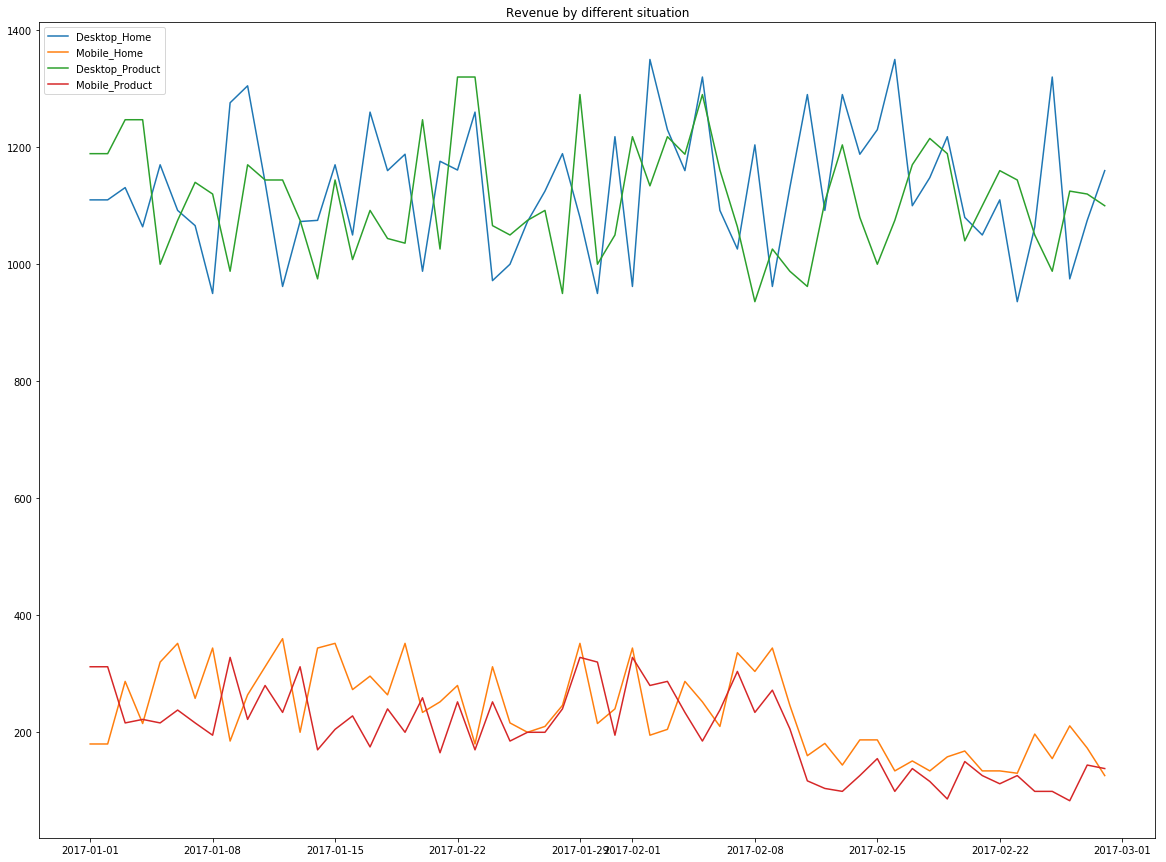

In [16]:
fig,ax=plt.subplots(figsize=(20,15))
plt.plot('Date','Revenue',data=DH)
plt.plot('Date','Revenue',data=MH)
plt.plot('Date','Revenue',data=DP)
plt.plot('Date','Revenue',data=MP)
plt.legend(['Desktop_Home','Mobile_Home','Desktop_Product','Mobile_Product'])
plt.title('Revenue by different situation')

Text(0.5, 1.0, 'Total Conversion rate by different situation')

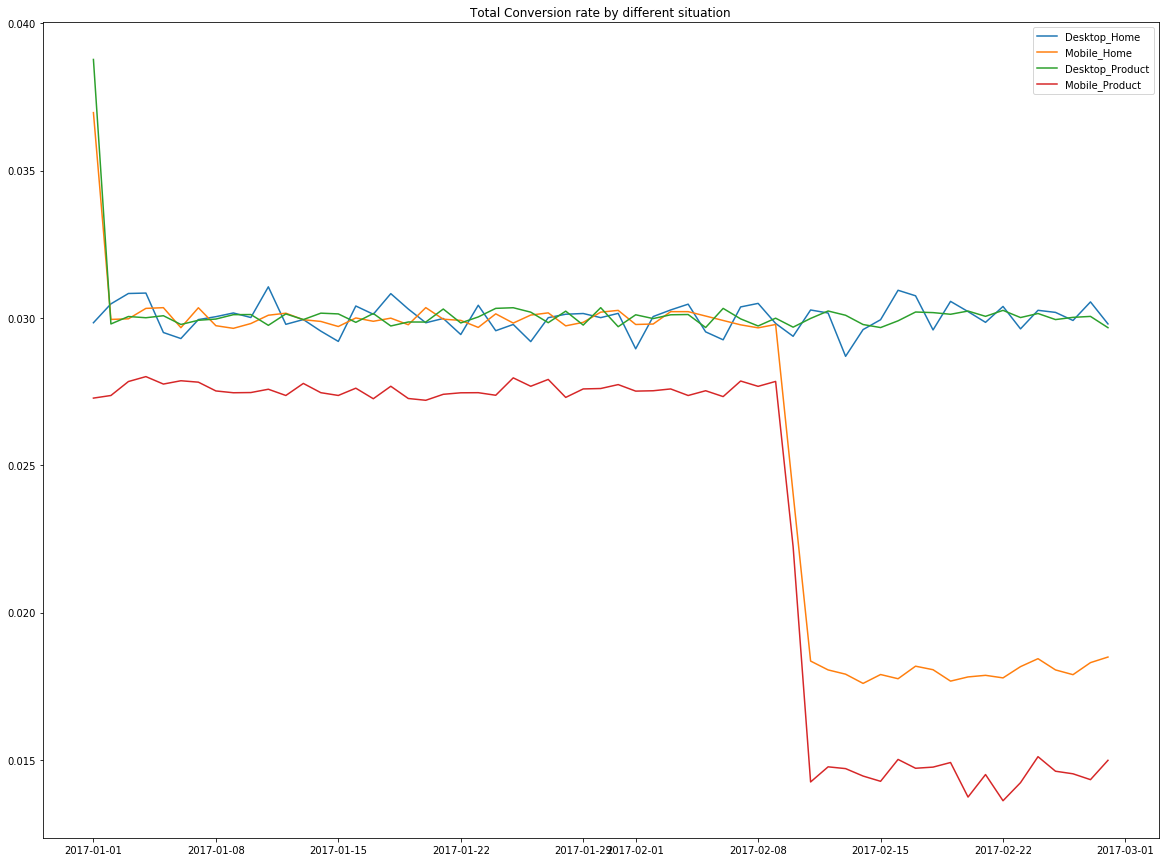

In [17]:
fig,ax=plt.subplots(figsize=(20,15))
plt.plot('Date','Land_to_TY',data=DH)
plt.plot('Date','Land_to_TY',data=MH)
plt.plot('Date','Land_to_TY',data=DP)
plt.plot('Date','Land_to_TY',data=MP)
plt.legend(['Desktop_Home','Mobile_Home','Desktop_Product','Mobile_Product'])
plt.title('Total Conversion rate by different situation')

Text(0.5, 1.0, 'Land to Checkout rate by different situation')

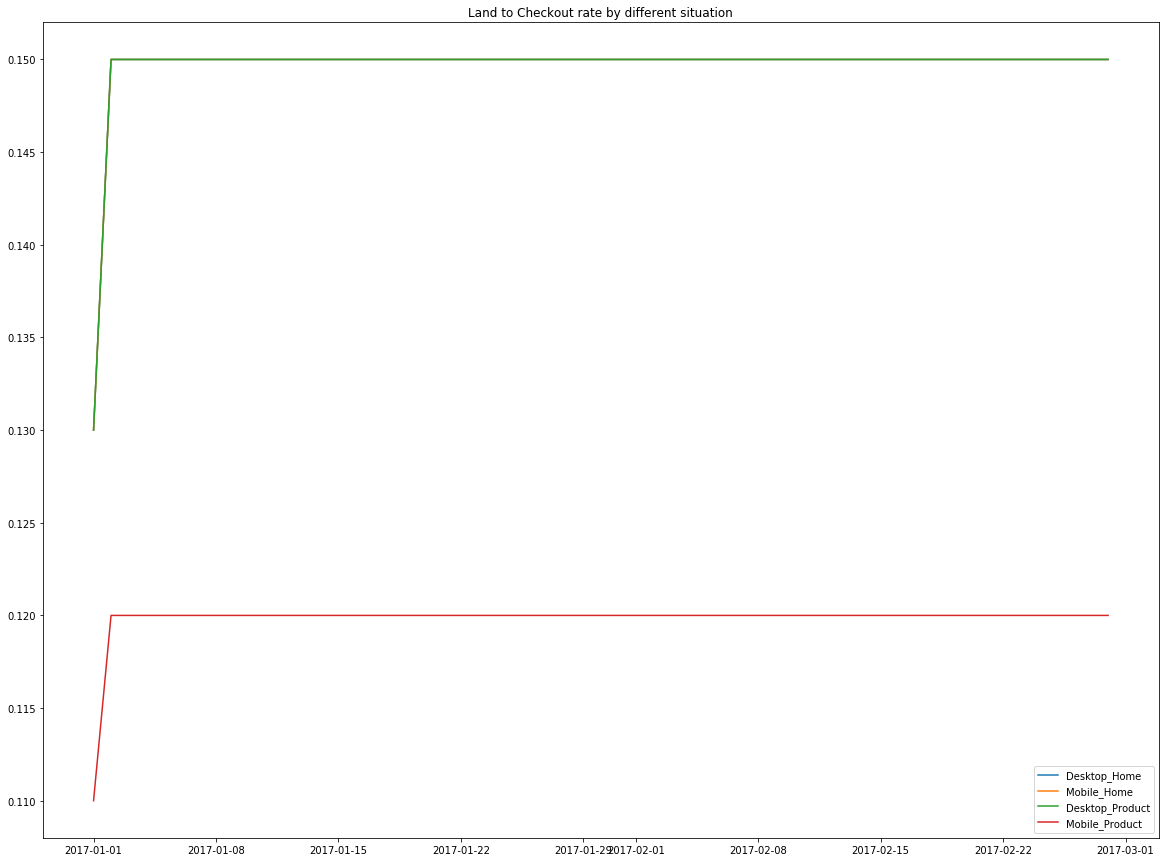

In [18]:
fig,ax=plt.subplots(figsize=(20,15))
plt.plot('Date','Land_to_checkout',data=DH)
plt.plot('Date','Land_to_checkout',data=MH)
plt.plot('Date','Land_to_checkout',data=DP)
plt.plot('Date','Land_to_checkout',data=MP)
plt.legend(['Desktop_Home','Mobile_Home','Desktop_Product','Mobile_Product'])
plt.title('Land to Checkout rate by different situation')

Text(0.5, 1.0, 'Checkout to Thank you page rate by different situation')

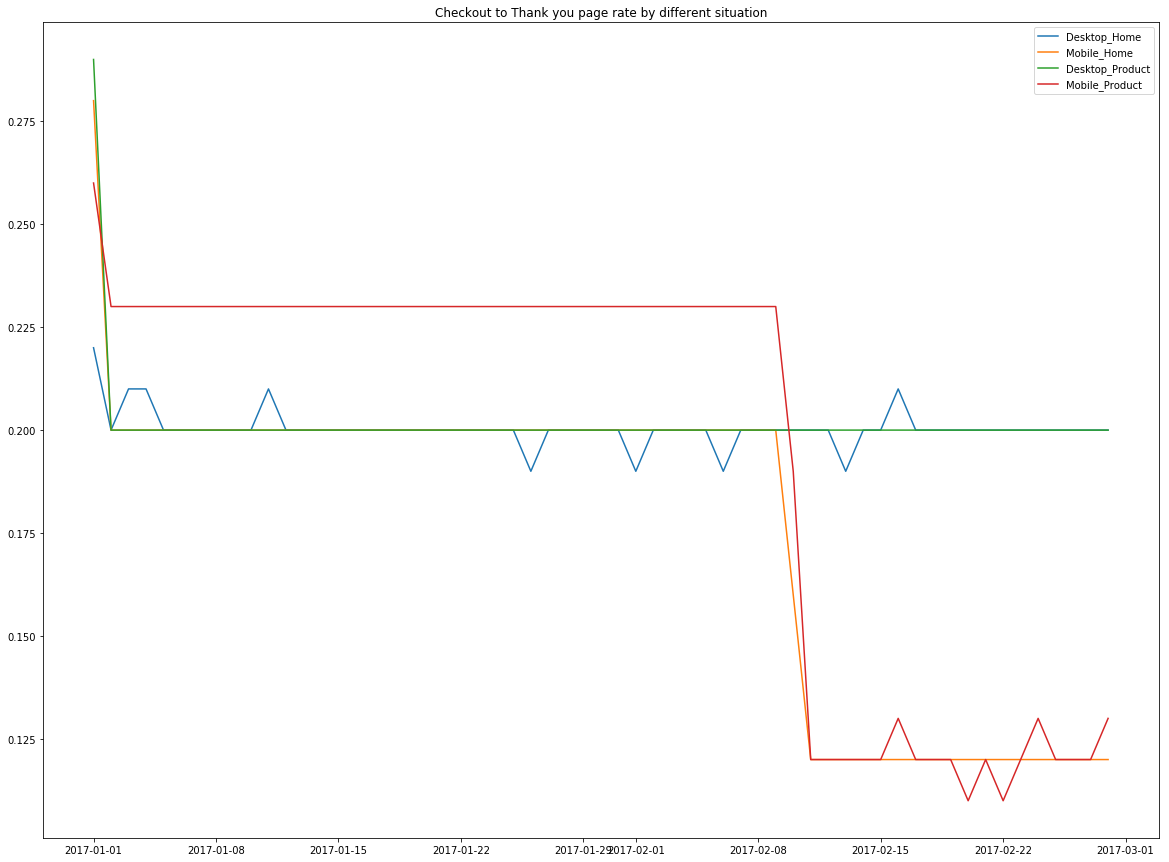

In [19]:
fig,ax=plt.subplots(figsize=(20,15))
plt.plot('Date','Checkout_to_TY',data=DH)
plt.plot('Date','Checkout_to_TY',data=MH)
plt.plot('Date','Checkout_to_TY',data=DP)
plt.plot('Date','Checkout_to_TY',data=MP)
plt.legend(['Desktop_Home','Mobile_Home','Desktop_Product','Mobile_Product'])
plt.title('Checkout to Thank you page rate by different situation')

Text(0.5, 1.0, 'Average revenue by different situation')

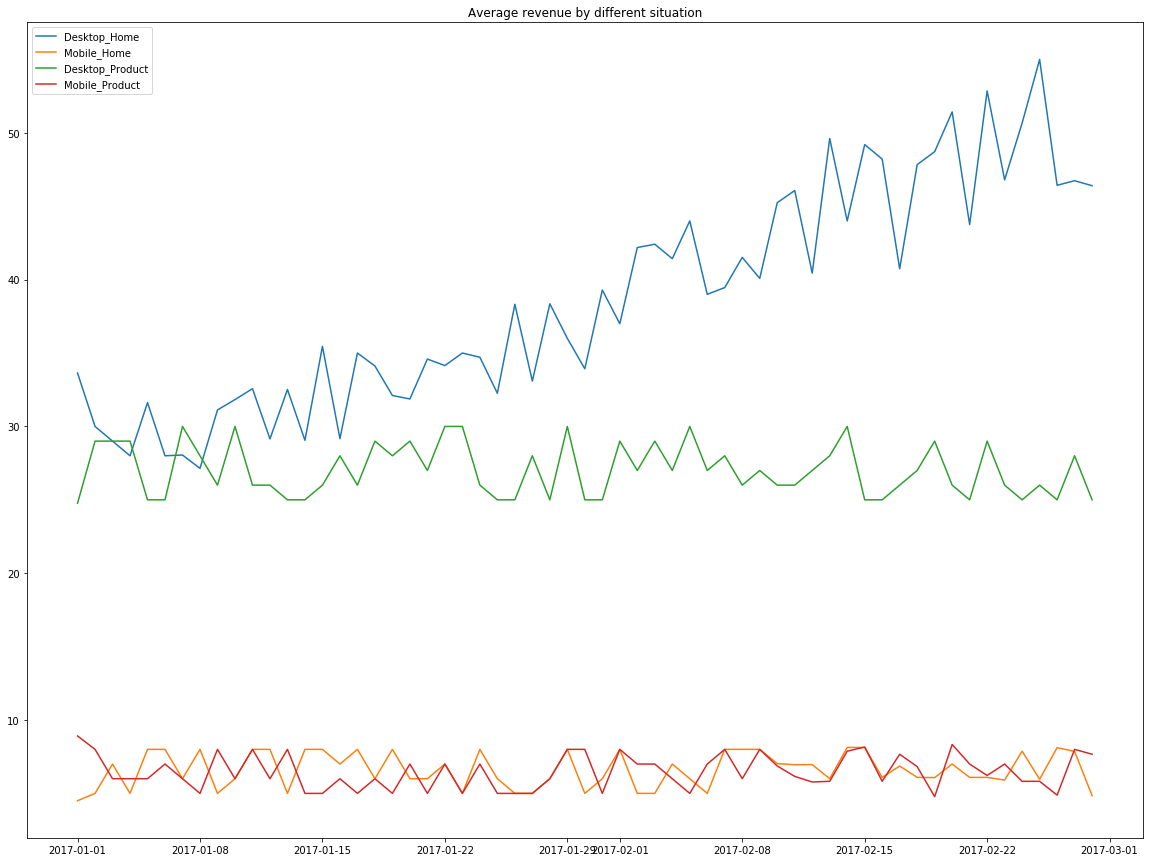

In [20]:
fig,ax=plt.subplots(figsize=(20,15))
plt.plot('Date','revenue_average',data=DH)
plt.plot('Date','revenue_average',data=MH)
plt.plot('Date','revenue_average',data=DP)
plt.plot('Date','revenue_average',data=MP)
plt.legend(['Desktop_Home','Mobile_Home','Desktop_Product','Mobile_Product'])
plt.title('Average revenue by different situation')

In [21]:
## The revenue decreased at 2-10-2017.The Conversion rate of checkout to thank you page  for Mobile platform droped between 02-10-2017 and 02-11-2017. This was the reason why total conversion rate and revenuw for mobile drop significatnly on that day

In [22]:
## I would recommend project manager to monitor the heckout to Thank you page rate ob mobile platform. Also the average revenue
## is another KPI manager should pay attention. The average revenue on mobile platform is much lower than those on Desktop 
##platform. 

In [23]:
##Try to use ARIMA Model to predict next month

In [24]:
from statsmodels.tsa.arima_model import ARIMA
DH=DH[['Date','Revenue']]
MH=MH[['Date','Revenue']]
DP=DP[['Date','Revenue']]
MP=MP[['Date','Revenue']]
DH['Revenue']=pd.to_numeric(DH['Revenue'])
MH['Revenue']=pd.to_numeric(MH['Revenue'])
DP['Revenue']=pd.to_numeric(DP['Revenue'])
MP['Revenue']=pd.to_numeric(MP['Revenue'])

C:\Users\CMJ\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [25]:
DH = pd.Series(DH['Revenue'].values, index=DH['Date'])

In [26]:
MH = pd.Series(MH['Revenue'].values, index=MH['Date'])
DP = pd.Series(DP['Revenue'].values, index=DP['Date'])
MP = pd.Series(MP['Revenue'].values, index=MP['Date'])

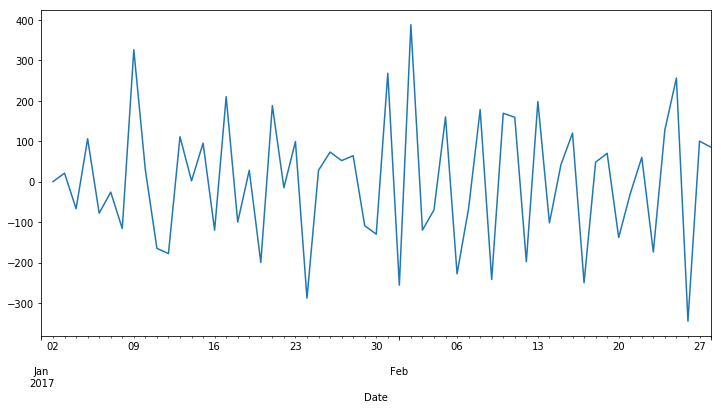

In [63]:
diff1 = DH.diff(1)
diff1.plot(figsize=(12,6))

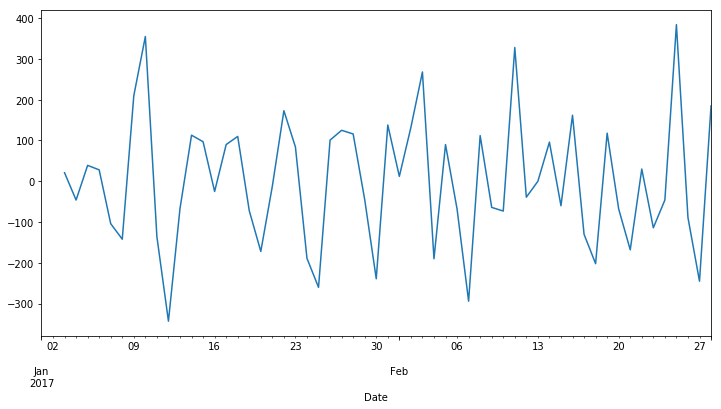

In [64]:
diff2 = DH.diff(2)
diff2.plot(figsize=(12,6))

In [29]:
## use 1 as d

In [30]:
import statsmodels.api as sm

C:\Users\CMJ\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


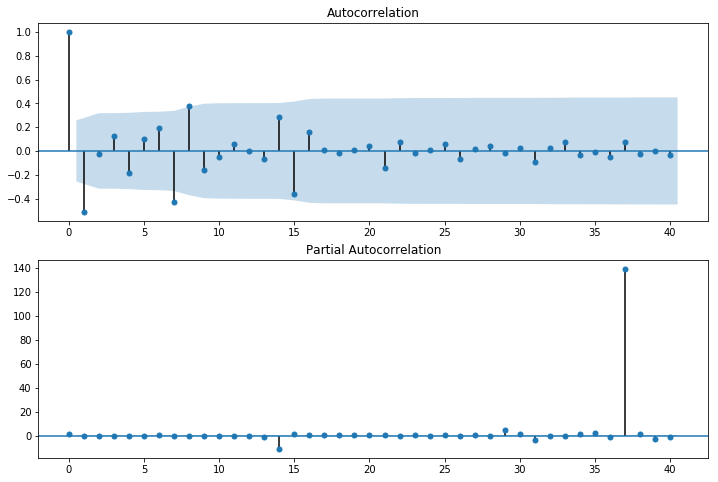

In [31]:

diff1.dropna(inplace=True)
fig = plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(diff1,lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(diff1,lags=40,ax=ax2)

In [32]:
## p=7 q=0

In [33]:
from statsmodels.tsa.ar_model import AutoReg

C:\Users\CMJ\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\CMJ\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   58
Model:                 ARIMA(7, 1, 0)   Log Likelihood                -353.718
Method:                       css-mle   S.D. of innovations            105.403
Date:                Sun, 14 Jun 2020   AIC                            725.436
Time:                        12:23:13   BIC                            743.980
Sample:                    01-02-2017   HQIC                           732.659
                         - 02-28-2017                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0163      3.348     -0.005      0.996      -6.578       6.545
ar.L1.D.y     -0.7718      0.122     -6.331      0.000      -1.011      -0.533
ar.L2.D.y     -0.6659      0.159     -4.195      0.0

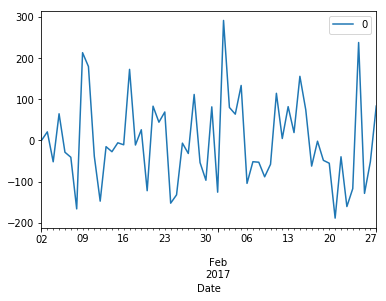

In [62]:
model_DH =ARIMA(DH, order=(7,1,0))
model_fit_DH = model_DH.fit(disp=0,transparams=False)
print(model_fit_DH.summary())
# plot residual errors
residuals_DH = pd.DataFrame(model_fit_DH.resid)
residuals_DH.plot()
plt.show()


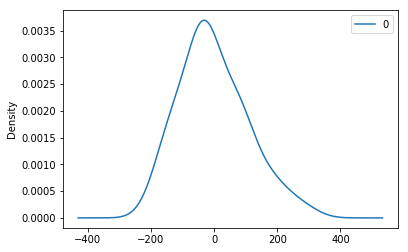

                0
count   58.000000
mean    -1.028996
std    106.821988
min   -189.060352
25%    -57.362757
50%    -13.055365
75%     73.342492
max    292.364706


In [53]:
residuals_DH.plot(kind='kde')
plt.show()
print(residuals_DH.describe())

In [92]:
model_fit_DH.forecast(steps=31)[0]


array([1042.87511908, 1168.95162622, 1080.08586243, 1005.51085898,
       1198.24085538, 1071.6445579 , 1074.06857974, 1143.31904151,
       1045.86708257, 1121.04204086, 1130.22890999, 1036.73009079,
       1135.91563326, 1097.66559153, 1071.83001975, 1134.231753  ,
       1073.26697007, 1090.60571532, 1129.75240498, 1066.1342403 ,
       1109.10970187, 1107.91594602, 1074.57560251, 1118.20833918,
       1093.42986577, 1083.06671474, 1118.67019306, 1083.9051279 ,
       1096.73327105, 1109.88950486, 1082.31233737])

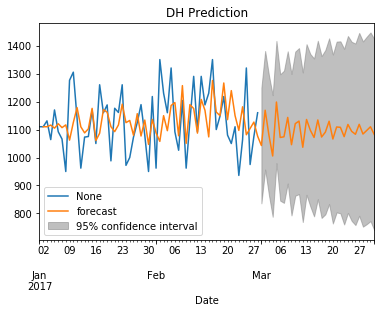

In [80]:
fig, ax = plt.subplots()
ax = DH.plot(ax=ax)
fig = model_fit_DH.plot_predict('2017-01-02','2017-03-31', ax=ax,plot_insample=False)
plt.title('DH Prediction')
plt.savefig('DH_Prediction')
plt.show()


In [39]:
from sklearn.metrics import mean_squared_error

C:\Users\CMJ\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\CMJ\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=1287.524390, expected=1204.000000
predicted=1084.111950, expected=962.000000


C:\Users\CMJ\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\CMJ\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=1395.094143, expected=1131.000000
predicted=1165.569254, expected=1290.000000
predicted=1132.157655, expected=1092.000000
predicted=1239.891247, expected=1290.000000
predicted=1108.436127, expected=1188.000000
predicted=1063.899002, expected=1230.000000
predicted=1265.038629, expected=1350.000000
predicted=1129.481864, expected=1100.000000
predicted=1169.131181, expected=1148.000000
predicted=1259.168155, expected=1218.000000
predicted=1155.483828, expected=1080.000000
predicted=1286.349099, expected=1050.000000
predicted=1132.145115, expected=1110.000000
predicted=1127.021956, expected=936.000000
predicted=1203.644696, expected=1064.000000
predicted=1054.243050, expected=1320.000000
predicted=1130.803827, expected=975.000000
predicted=1137.542376, expected=1075.000000
predicted=1062.555228, expected=1160.000000
Test MSE: 18177.932


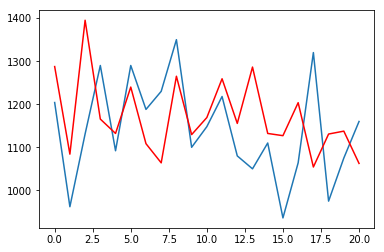

In [43]:
X = DH.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(7,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

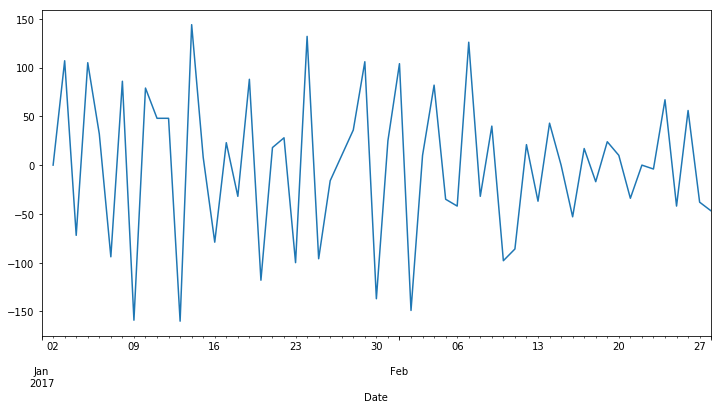

In [56]:
##Use similar method to predicy the revenue for MH,DP,MP
diff1 = MH.diff(1)
diff1.plot(figsize=(12,6))

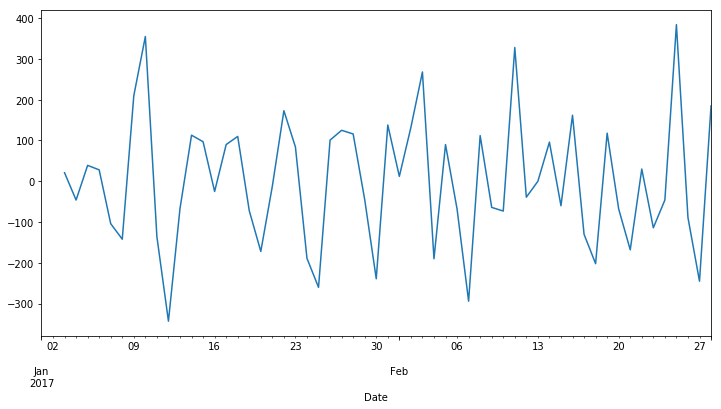

In [57]:
diff2 = DH.diff(2)
diff2.plot(figsize=(12,6))

C:\Users\CMJ\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


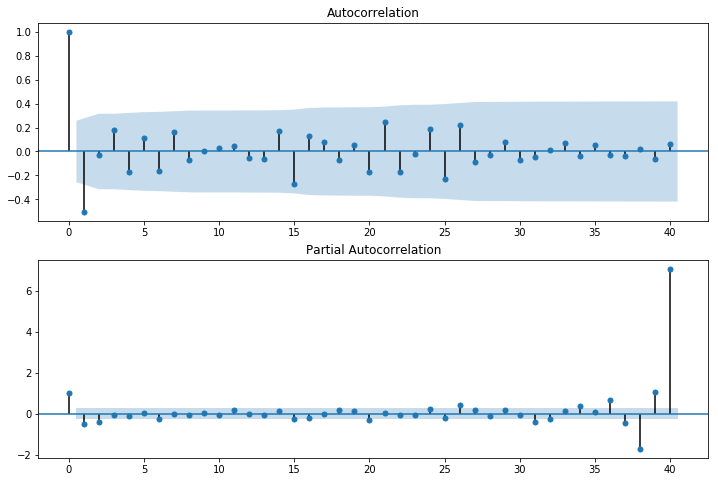

In [58]:
diff1.dropna(inplace=True)
fig = plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(diff1,lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(diff1,lags=40,ax=ax2)

C:\Users\CMJ\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\CMJ\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   58
Model:                 ARIMA(3, 1, 0)   Log Likelihood                -319.652
Method:                       css-mle   S.D. of innovations             59.550
Date:                Sun, 14 Jun 2020   AIC                            649.305
Time:                        12:26:52   BIC                            659.607
Sample:                    01-02-2017   HQIC                           653.318
                         - 02-28-2017                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7605      3.625     -0.210      0.834      -7.866       6.345
ar.L1.D.y     -0.7191      0.132     -5.447      0.000      -0.978      -0.460
ar.L2.D.y     -0.4245      0.154     -2.749      0.0

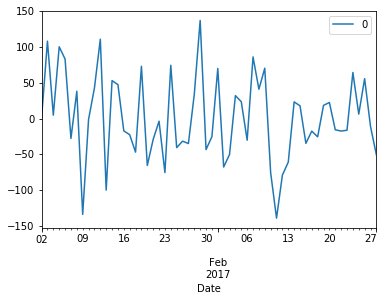

In [65]:
model_MH =ARIMA(MH, order=(3,1,0))
model_fit_MH = model_MH.fit(disp=0)
print(model_fit_MH.summary())
# plot residual errors
residuals_MH = pd.DataFrame(model_fit_MH.resid)
residuals_MH.plot()
plt.show()

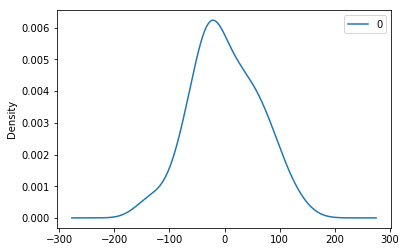

                0
count   58.000000
mean     0.796578
std     60.332998
min   -139.201996
25%    -34.878652
50%     -7.374260
75%     42.229685
max    137.112619


In [66]:
residuals_MH.plot(kind='kde')
plt.show()
print(residuals_MH.describe())

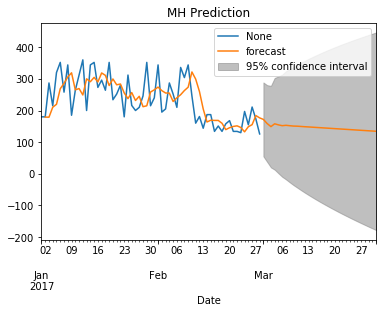

In [81]:
fig, ax = plt.subplots()
ax = MH.plot(ax=ax)
fig = model_fit_MH.plot_predict('2017-01-02','2017-03-31', ax=ax,plot_insample=False)
plt.title('MH Prediction')
plt.savefig('MH_Prediction')
plt.show()

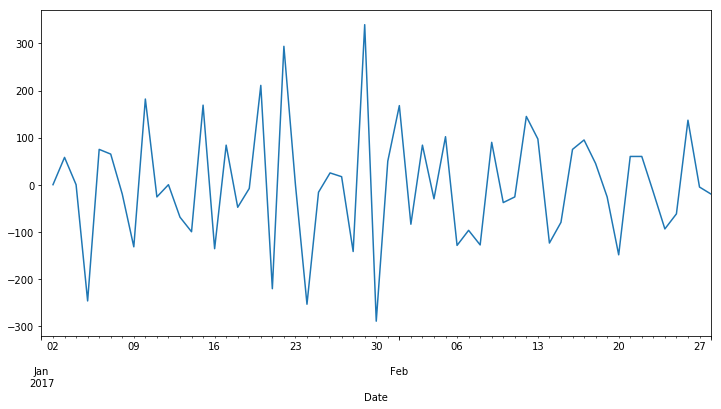

In [68]:
##DP
diff1 = DP.diff(1)
diff1.plot(figsize=(12,6))

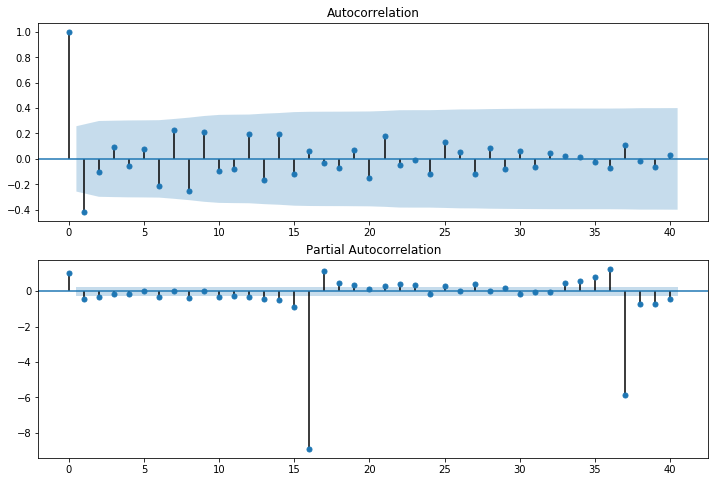

In [69]:
diff1.dropna(inplace=True)
fig = plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(diff1,lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(diff1,lags=40,ax=ax2)

C:\Users\CMJ\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\CMJ\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   58
Model:                 ARIMA(3, 1, 0)   Log Likelihood                -352.848
Method:                       css-mle   S.D. of innovations            105.693
Date:                Sun, 14 Jun 2020   AIC                            715.695
Time:                        12:30:47   BIC                            725.997
Sample:                    01-02-2017   HQIC                           719.708
                         - 02-28-2017                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7905      6.584     -0.272      0.786     -14.694      11.113
ar.L1.D.y     -0.5947      0.129     -4.593      0.000      -0.848      -0.341
ar.L2.D.y     -0.4060      0.140     -2.892      0.0

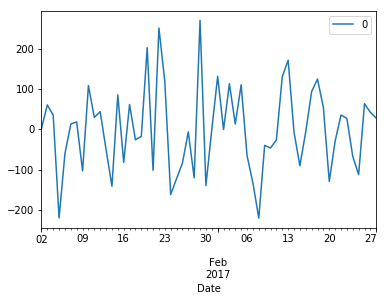

In [70]:
model_DP =ARIMA(DP, order=(3,1,0))
model_fit_DP = model_DP.fit(disp=0)
print(model_fit_DP.summary())
# plot residual errors
residuals_DP = pd.DataFrame(model_fit_DP.resid)
residuals_DP.plot()
plt.show()

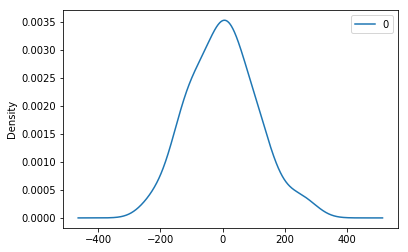

                0
count   58.000000
mean     0.546240
std    106.654925
min   -219.964514
25%    -78.170429
50%     -0.472174
75%     61.325287
max    269.786568


In [71]:
residuals_DP.plot(kind='kde')
plt.show()
print(residuals_DP.describe())

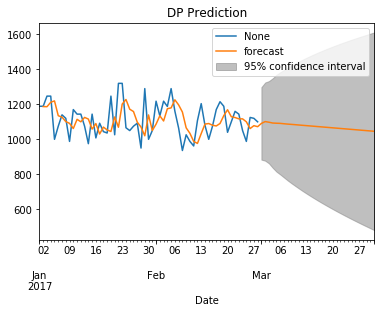

In [83]:
fig, ax = plt.subplots()
ax = DP.plot(ax=ax)
fig = model_fit_DP.plot_predict('2017-01-02','2017-03-31', ax=ax,plot_insample=False)
plt.title('DP Prediction')
plt.savefig('DP_Prediction')
plt.show()

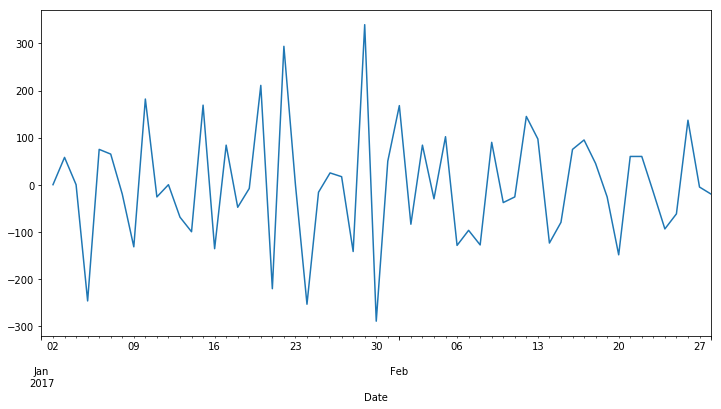

In [73]:
##MP
diff1 = DP.diff(1)
diff1.plot(figsize=(12,6))

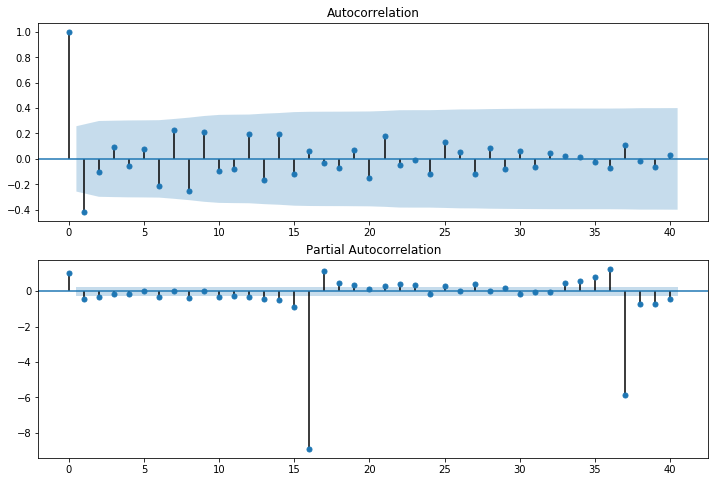

In [74]:
diff1.dropna(inplace=True)
fig = plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(diff1,lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(diff1,lags=40,ax=ax2)

C:\Users\CMJ\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\CMJ\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   58
Model:                 ARIMA(3, 1, 0)   Log Likelihood                -309.219
Method:                       css-mle   S.D. of innovations             49.834
Date:                Sun, 14 Jun 2020   AIC                            628.438
Time:                        12:35:31   BIC                            638.740
Sample:                    01-02-2017   HQIC                           632.451
                         - 02-28-2017                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.9053      3.385     -0.858      0.391      -9.540       3.730
ar.L1.D.y     -0.6165      0.131     -4.715      0.000      -0.873      -0.360
ar.L2.D.y     -0.1983      0.159     -1.250      0.2

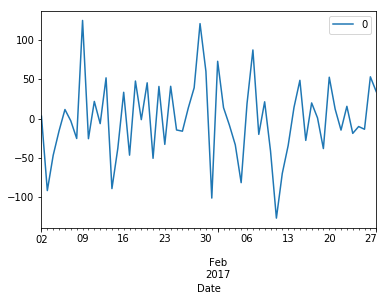

In [75]:
model_MP =ARIMA(MP, order=(3,1,0))
model_fit_MP = model_MP.fit(disp=0)
print(model_fit_MP.summary())
# plot residual errors
residuals_MP = pd.DataFrame(model_fit_MP.resid)
residuals_MP.plot()
plt.show()

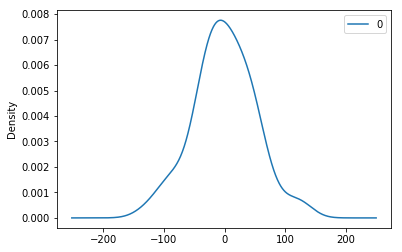

                0
count   58.000000
mean    -0.460745
std     50.323253
min   -126.503834
25%    -31.587917
50%     -2.262264
75%     33.917193
max    124.534069


In [76]:
residuals_MP.plot(kind='kde')
plt.show()
print(residuals_MP.describe())

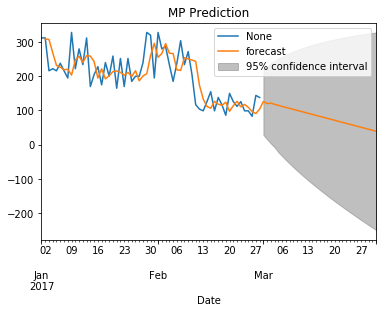

In [82]:
fig, ax = plt.subplots()
ax = MP.plot(ax=ax)
fig = model_fit_MP.plot_predict('2017-01-02','2017-03-31', ax=ax,plot_insample=False)
plt.title('MP Prediction')
plt.savefig('MP_Prediction')
plt.show()

In [88]:
Desktop=['Desktop']*31
Mobile=['Mobile']*31
Home=['Home']*31
Product=['Product']*31

In [90]:
mydate=pd.date_range('2017-03-01', '2017-03-31').tolist()

In [103]:
DH_March = pd.DataFrame()
DH_March['Device']=Desktop
DH_March['Landing_page']=Home
DH_March['Revenue']=model_fit_DH.forecast(steps=31)[0].tolist()
DH_March['Date']=mydate

In [105]:
MH_March = pd.DataFrame()
MH_March['Device']=Mobile
MH_March['Landing_page']=Home
MH_March['Revenue']=model_fit_MH.forecast(steps=31)[0].tolist()
MH_March['Date']=mydate

In [106]:
DP_March = pd.DataFrame()
DP_March['Device']=Desktop
DP_March['Landing_page']=Product
DP_March['Revenue']=model_fit_DP.forecast(steps=31)[0].tolist()
DP_March['Date']=mydate

In [107]:
MP_March = pd.DataFrame()
MP_March['Device']=Mobile
MP_March['Landing_page']=Product
MP_March['Revenue']=model_fit_MP.forecast(steps=31)[0].tolist()
MP_March['Date']=mydate

In [108]:
March=pd.DataFrame()
March=pd.concat([DH_March,MH_March,DP_March,MP_March])

In [112]:
pd.set_option('display.max_rows', None)

In [114]:
March.reset_index()

,index,Device,Landing_page,Revenue,Date
0,0,Desktop,Home,1042.875119,2017-03-01
1,1,Desktop,Home,1168.951626,2017-03-02
2,2,Desktop,Home,1080.085862,2017-03-03
3,3,Desktop,Home,1005.510859,2017-03-04
4,4,Desktop,Home,1198.240855,2017-03-05
5,5,Desktop,Home,1071.644558,2017-03-06
6,6,Desktop,Home,1074.068580,2017-03-07
7,7,Desktop,Home,1143.319042,2017-03-08
8,8,Desktop,Home,1045.867083,2017-03-09
9,9,Desktop,Home,1121.042041,2017-03-10
